In [1]:
import sys
sys.path.append('../../src/eda/')
sys.path.append('../../src/utils/')
sys.path.append('../../src')

# library to check
import plots as pl

# SFL Plotting Defaults

Annoyingly Seaborn is like herpes - and plots run after importing seaborn will not conform to standard SFL templates. It is almost impossible to get rid of without resetting the kernel - you need to **explicitly** run sfl_defaults() which resides in matplotlib_defaults

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [3]:
import matplotlib_defaults

SFL style loaded...


In [21]:
import pandas as pd
import numpy as np

# set up a dummy dataset
df = pd.DataFrame(np.random.randint(0,200,size=(100, 8)), 
                  columns=list('ABCDEFGH'))

df2 = pd.DataFrame(np.random.randint(0,200,size=(100, 8)), 
                  columns=list('ABCDEFGH'))
df.head()

,A,B,C,D,E,F,G,H
0,195,141,35,126,23,39,21,93
1,65,6,20,9,9,80,121,193
2,36,41,138,93,81,77,169,48
3,164,28,31,121,136,188,63,167
4,63,17,31,119,18,129,45,22


# Different plotting scripts

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
#importlib.reload(mpl); 
importlib.reload(plt); importlib.reload(sns)

<module 'seaborn' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/__init__.py'>

## Standard Histograms

In [6]:
import matplotlib.pyplot as plt

def sfl_defaults():
	plt.style.use('classic')
	plt.rcParams['figure.figsize'] = [8.0, 5.0]
	plt.rcParams['figure.facecolor']='w'

	# text size
	plt.rcParams['xtick.labelsize']=14
	plt.rcParams['ytick.labelsize']=14
	plt.rcParams['axes.labelsize']=15
	plt.rcParams['axes.titlesize']=16
	plt.rcParams['legend.fontsize']=12

	# grids
	plt.rcParams['grid.color'] = 'k'
	plt.rcParams['grid.linestyle'] = ':'
	plt.rcParams['grid.linewidth'] = 0.5

	# 
	print('SFL style loaded...')

sfl_defaults()

SFL style loaded...


(1, 10)

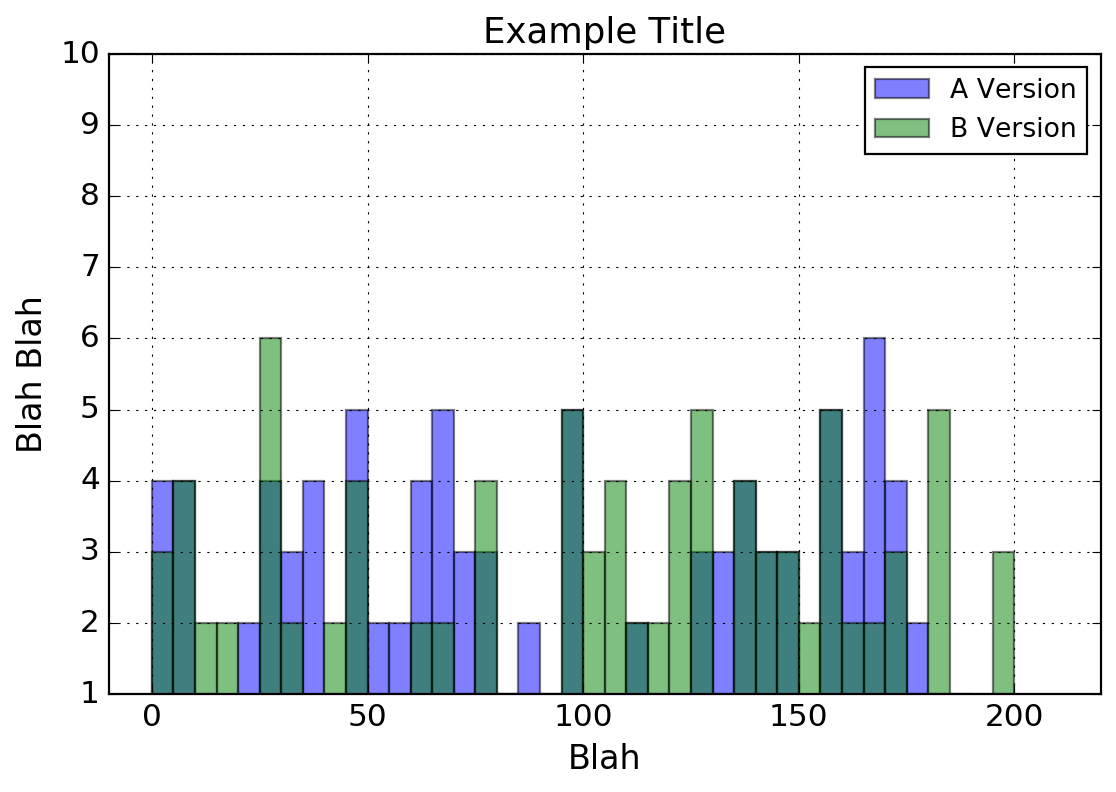

In [7]:
# example histogram
df['A'].hist(bins=[x*5 for x in range(50)], alpha=0.5, label='A Version')
df['B'].hist(bins=[x*5 for x in range(50)], alpha=0.5, label='B Version')

plt.legend()
plt.xlabel('Blah')
plt.ylabel('Blah Blah')
plt.title('Example Title')
plt.xlim([-10,220])
plt.ylim([1,10])

### Correlation Matrix Plot

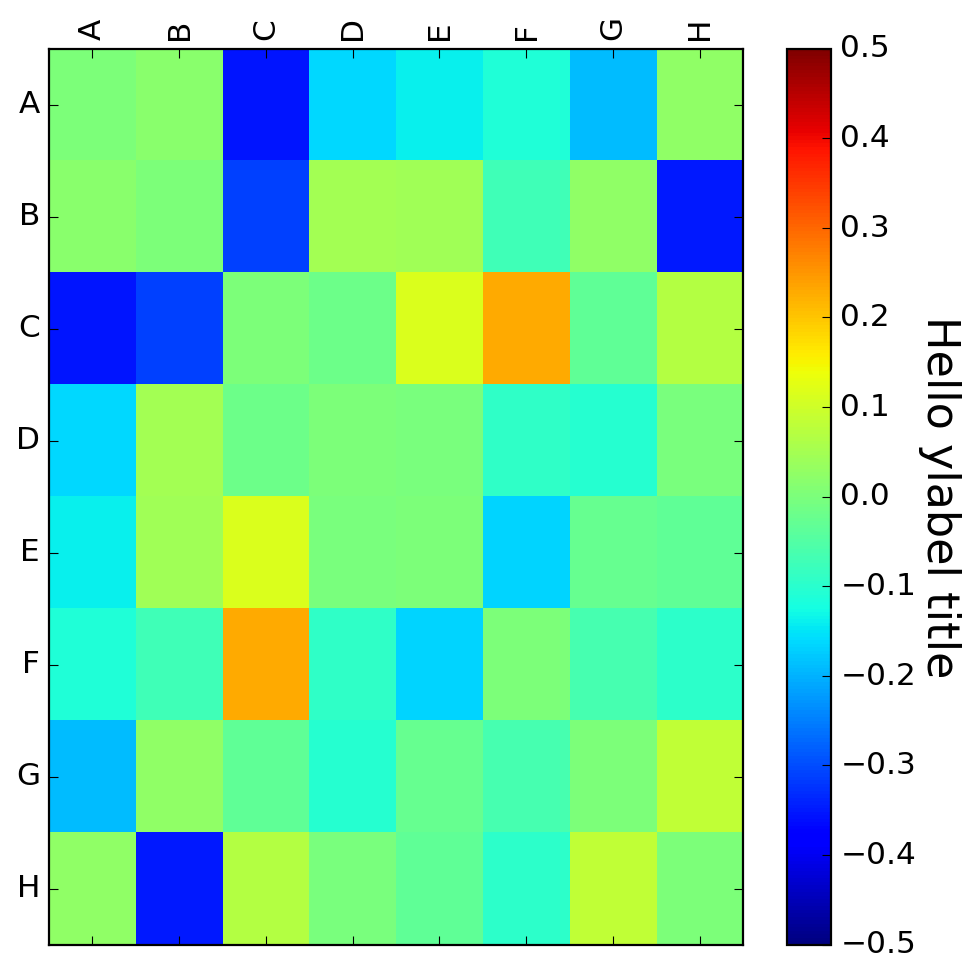

In [8]:
pl.correlation_matrix(df, 
                      df2, 
                      ylabel='Hello ylabel title'
                     )

### Correlation Scatter Plot

In [9]:
from imp import reload
reload(pl)

<module 'plots' from '../../src/eda/plots.py'>

In [10]:
df3 = df2.copy(deep=True)

# add a class label for illustration
df3['class_column'] = ['B' if df2['A'][x] > 100  else 'A' for x in range(df2.shape[0])]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


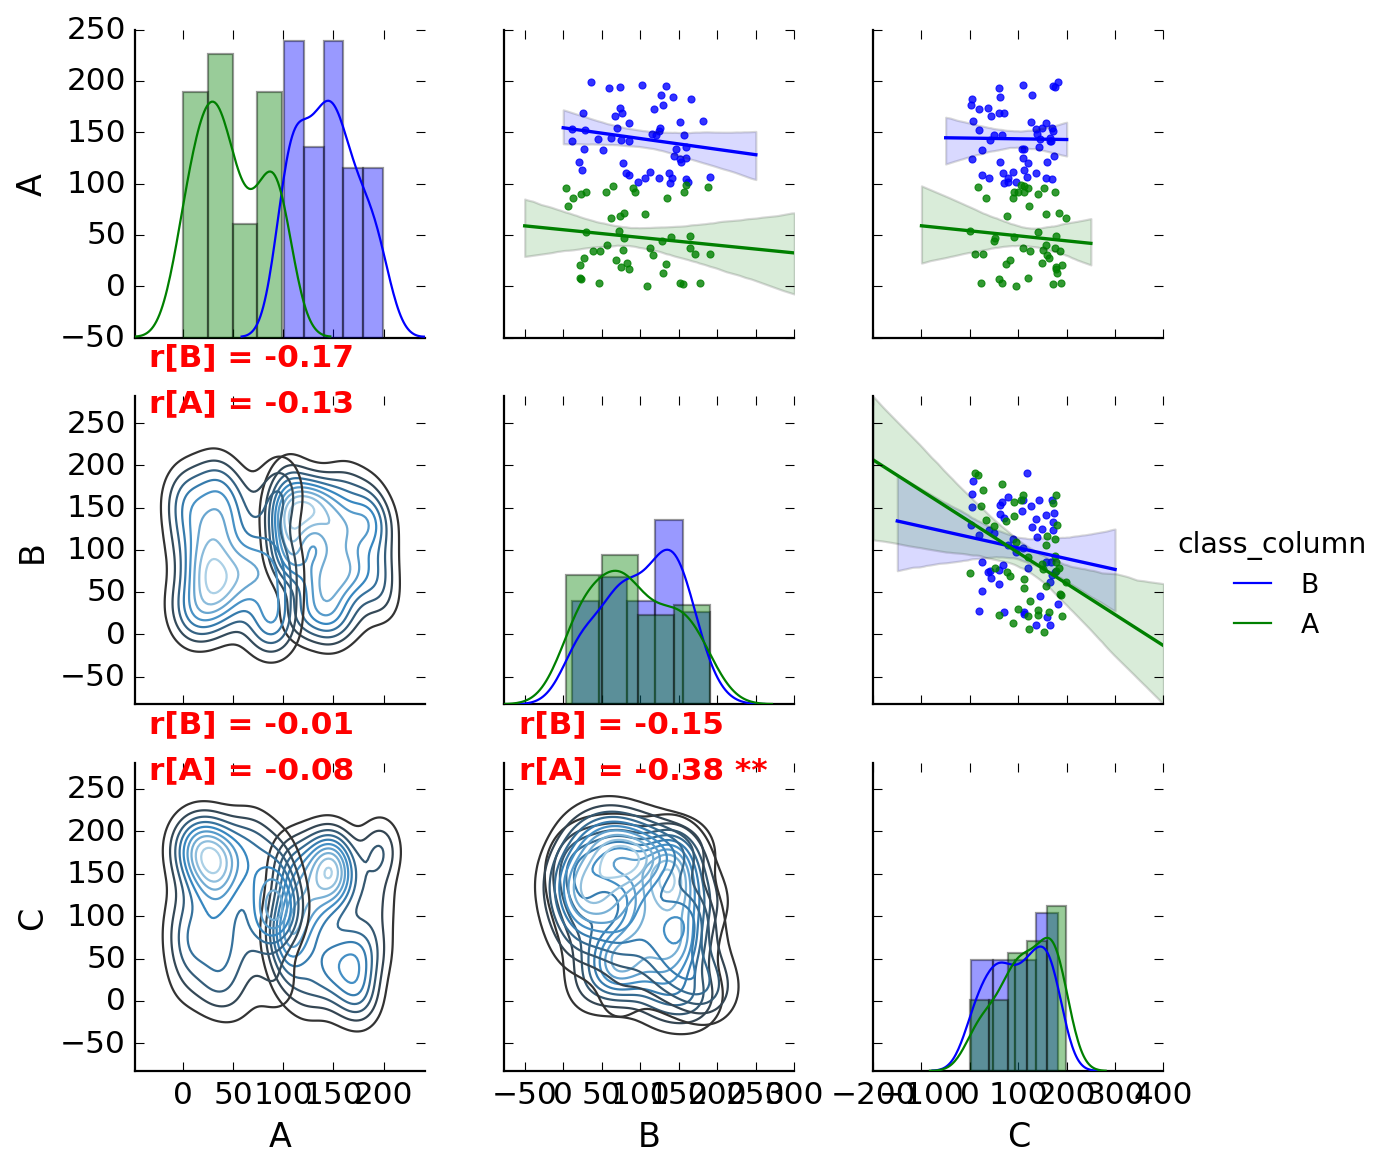

In [11]:
pl.correlation_scatter(df3[['A','B','C','class_column']], 
                       class_column='class_column')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Patch object at 0x125c294e0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


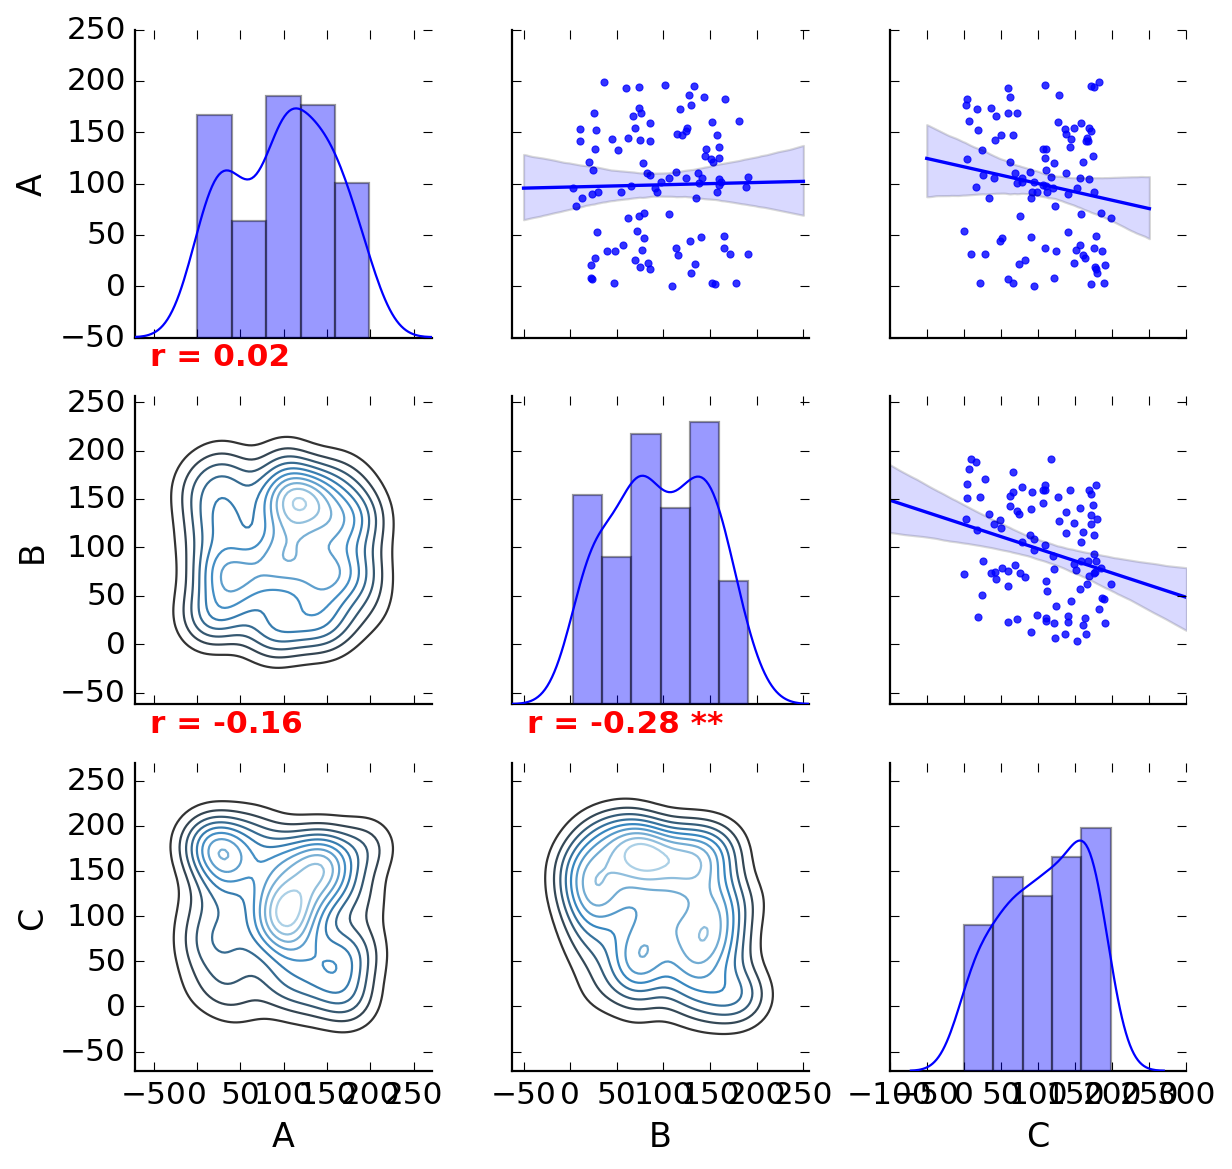

In [12]:
pl.correlation_scatter(df3[['A','B','C']], 
                       class_column=None)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


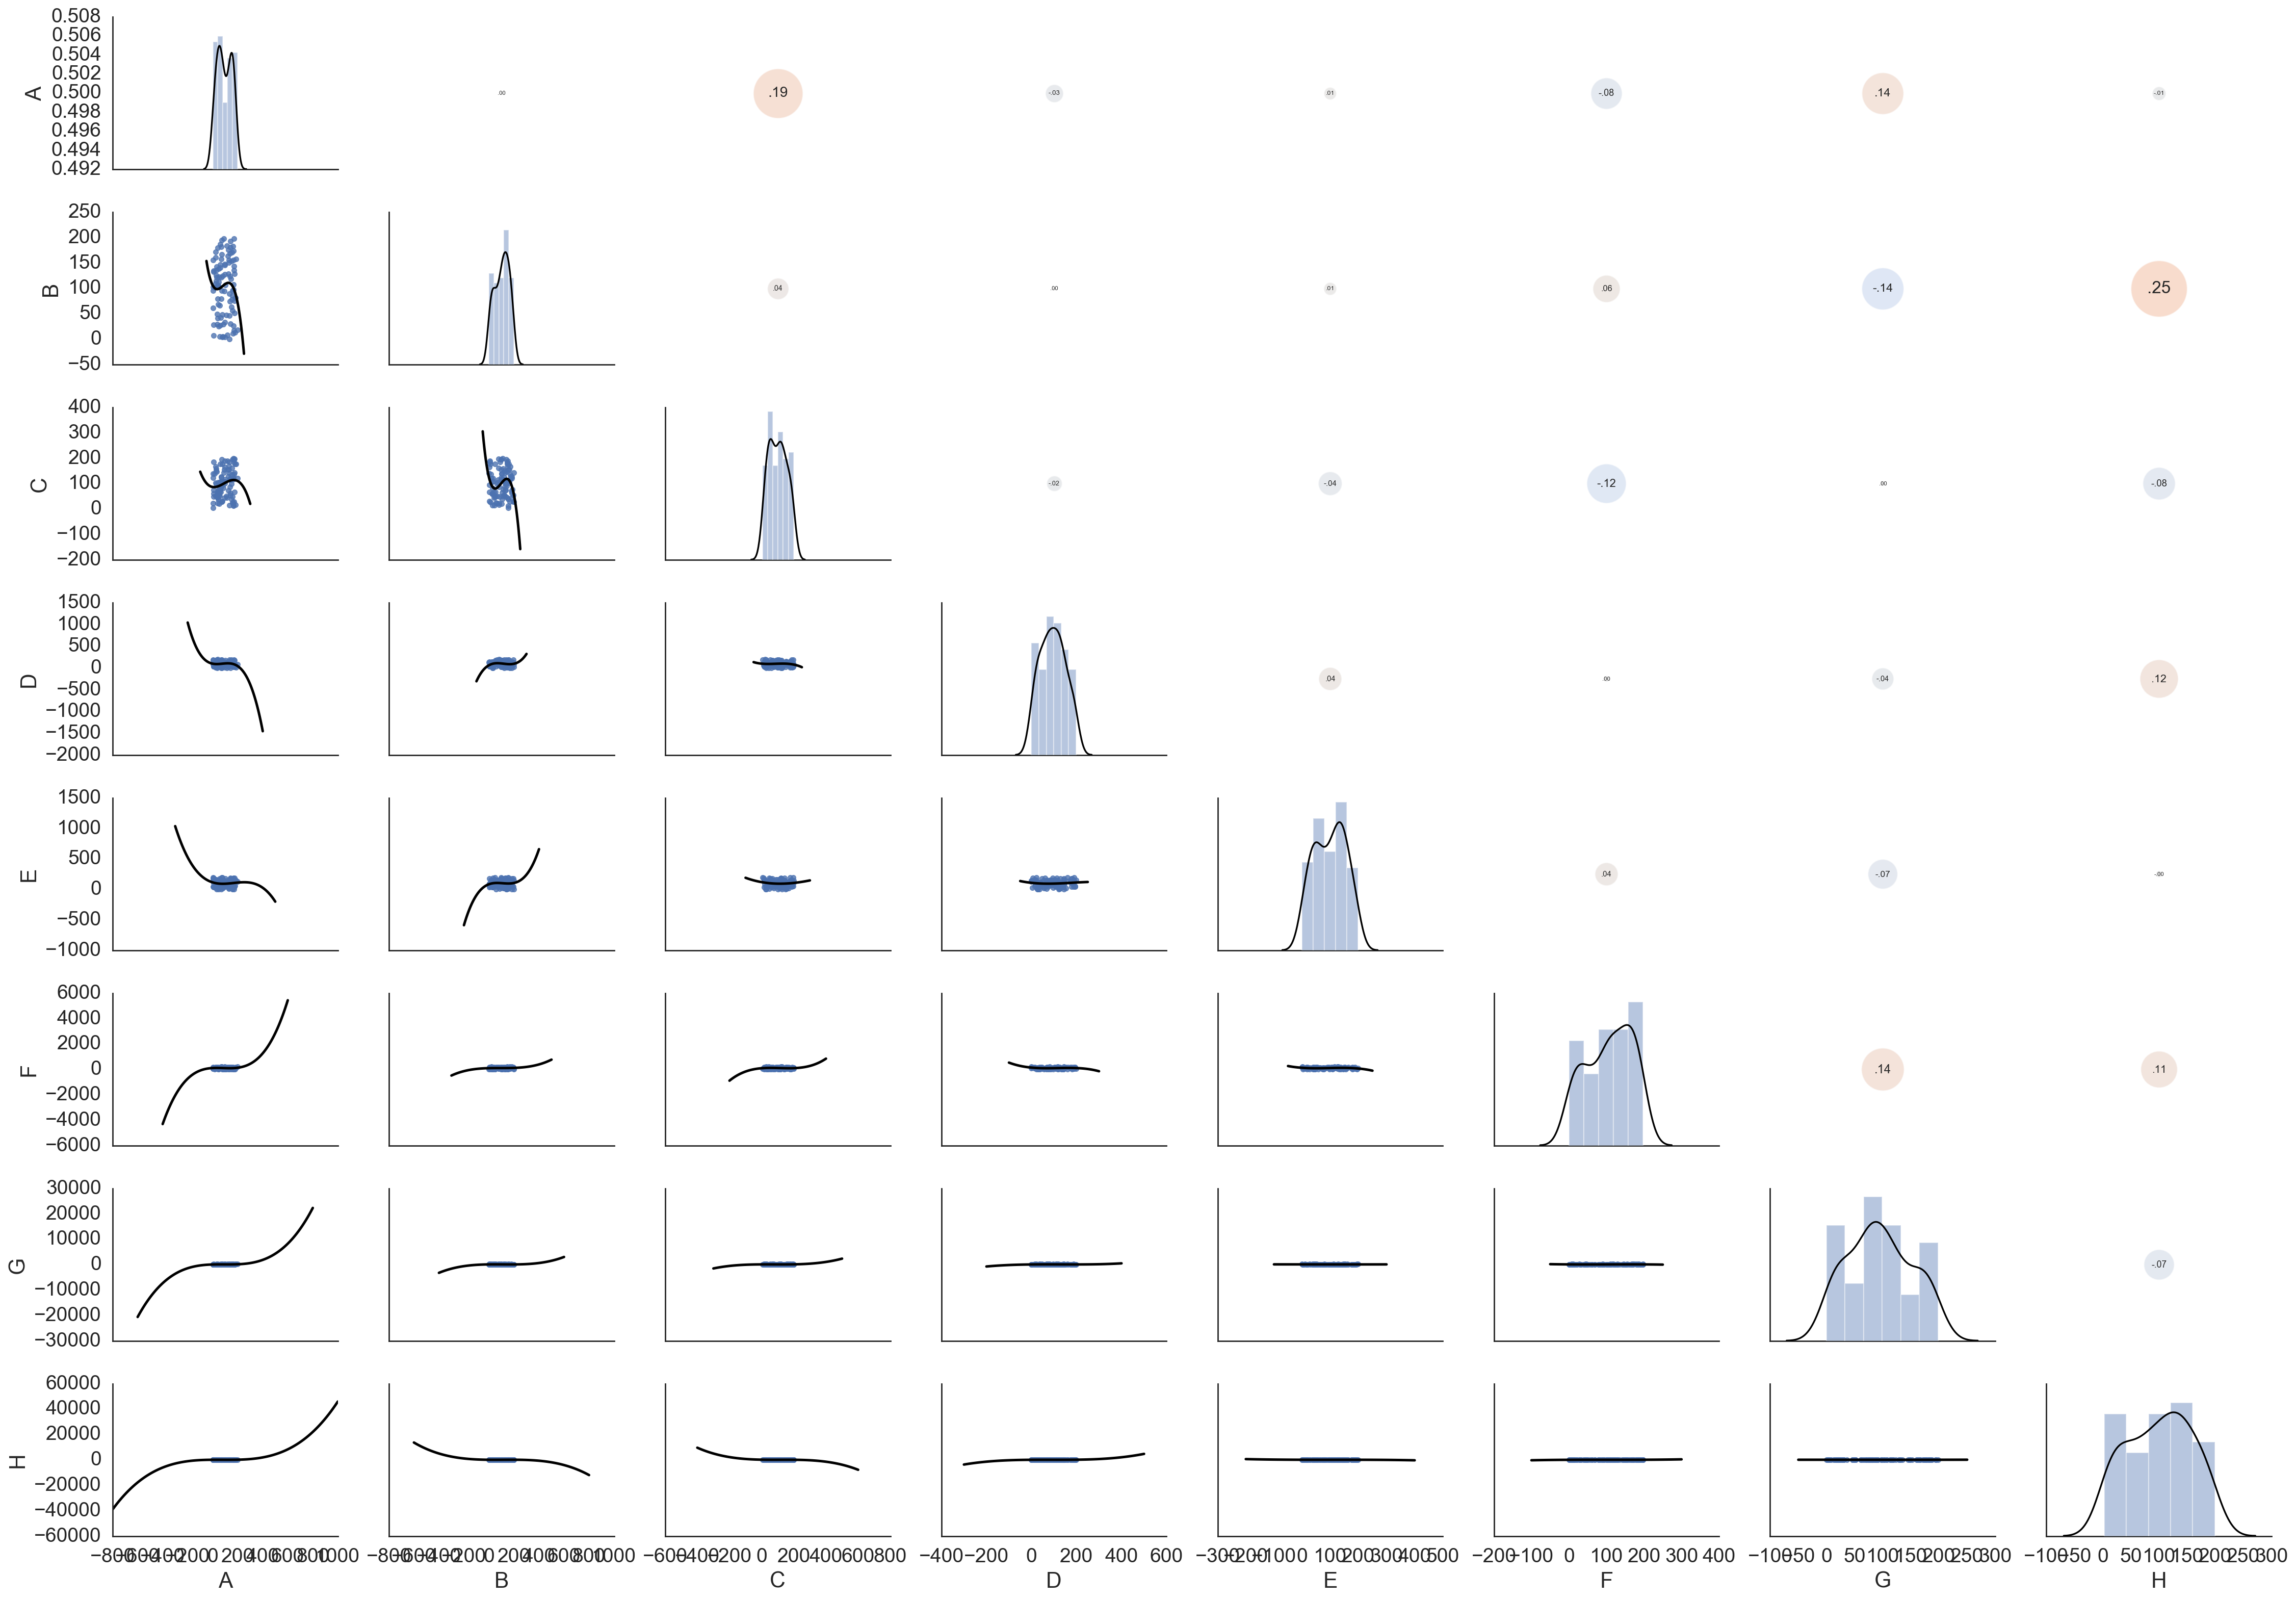

In [13]:
pl.correlation_scatter_v2(df)

## Scatter Plots with Contours

```
def scatter_plot(x, y, title='', fig_size=(7,7),  
                 x_label="Predicted", y_label="Actual",
                 x_range = None,
                 y_range = None,
                 marker_color='orange', 
                 marker_size = 5,
                 scatter=True,
                 density=False, 
                 depth=100j,
                 contour=False,
                 best_fit = False,
                 best_fit_ci=80,
                 line_color='yellow',
                 line_width=3,
                 best_spline = False, 
                 k_spline = 3,
                 s_spline = None,
                 c_spline = 'k',
                 lw_spline=3,
                 one_to_one = False,
                 
                ):
    
    Scatter plot with all the fixings - density, contour lines, best fit, spline, and 1-1
    
    Args: 
        x (float list)     : x values
        y (float list)     : y values
        title (str)        : 
        figsize (int tuple): 
        x_label (str)      : 
        y_label (str)      :
        marker_color (str) : 
        marker_size (float):
        scatter (bool)     : 
        density (bool)     : 
        depth (imag float) : depth of the density plot - note imaginary number! 
        contour (bool)     : show contours
        best_fit (bool)    : show best fit line
        best_fit_ci (float): best fit confidence interval
        line_color (str)   : best fit line color
        line_width (float) : best fit line width
        best_spline (bool) : show spline
        k_spline (int)     : spline number of knots, <=5 see scipy doc for details
        s_spline (int)     : spline smoothness, can be >100,000 for smooth splines, 0 is fits all points
        c_spline (str)     : spline color
        lw_spline (float)  : spline width
        one_to_one (bool)  : show 1-1 line
        
    Output:
        Plot
    '''

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Line of Best Fit: 		 y = 0.00047350084970098174x + 102.67529204977127


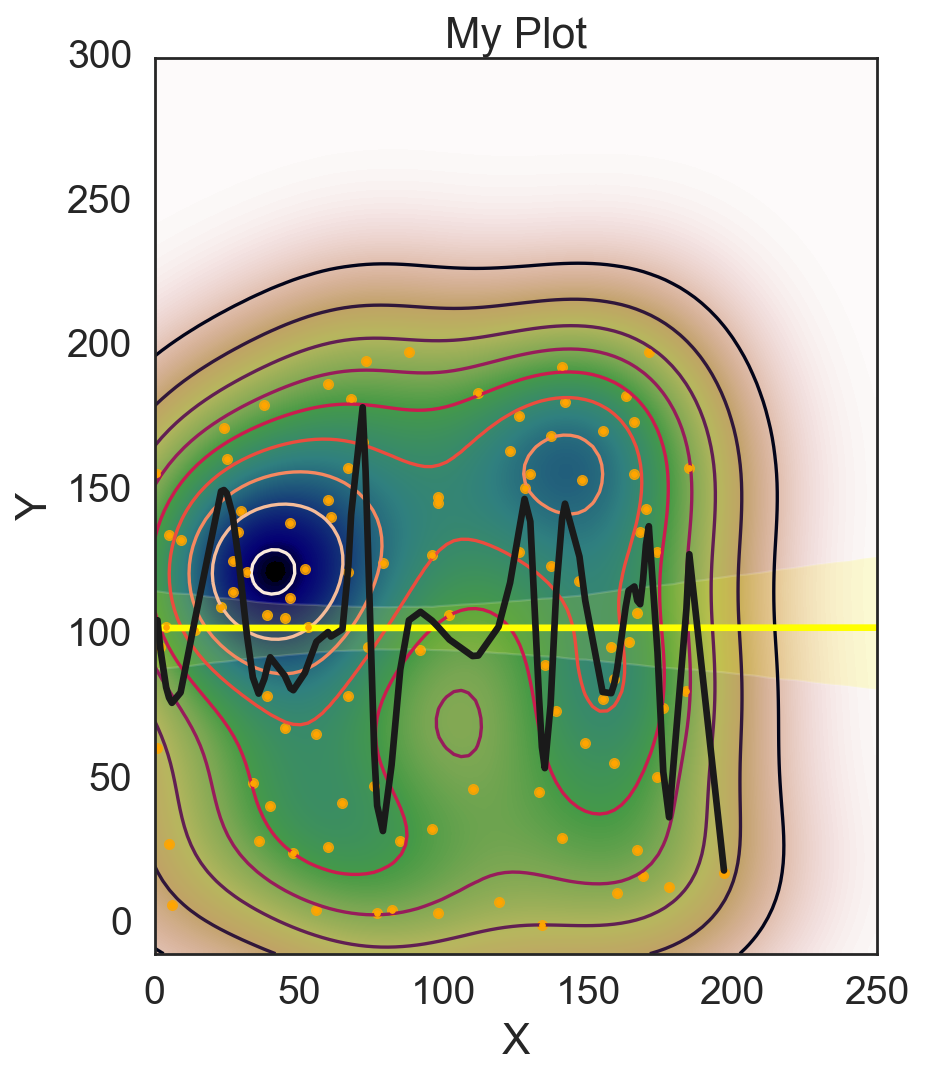

In [19]:
pl.scatter_plot(
    df['A'], df['B'],
    title='My Plot', fig_size=(7,7),  
    x_label="X", 
    y_label="Y",
    x_range = (0,250),
    y_range = (-10,300),
    marker_color='orange', 
    marker_size = 5,
    scatter=True,
    density=True, 
    depth=100j,
    contour=True,
    best_fit = True,
    best_fit_ci=80,
    line_color='yellow',
    best_spline = True, 
    k_spline = 3,
    s_spline = 150000, 
    c_spline = 'k',
    one_to_one = False
            
)

## Correlation Bar Graph of the Top Most Correlation

```
def correlation_bar_graph(df, var, top_n_feats = 10, negative_corrs = False, include_self = False,  title = 'Correlation Plot'):
    """
    Function plots a bar graph with the top N highest correlations for a given variable
    Input:
        dat (pd.DataFrame): pandas DataFrame (m row by n columns)
        var (string): name of the variable for which correlations are to be calculated
        top_n_feats (int): number of features to plot, in order of highest correlation
        negative_corrs (boolean): true if the plot should have features with negative instead of positive correlation
        include_self (boolean): true if the variable itself should be included in plot (correlation of 1)
        title (str): title of the plot, default is 'Correlation Plot'
    Output:
        a ranked bar graph of top N features
    """ 
```

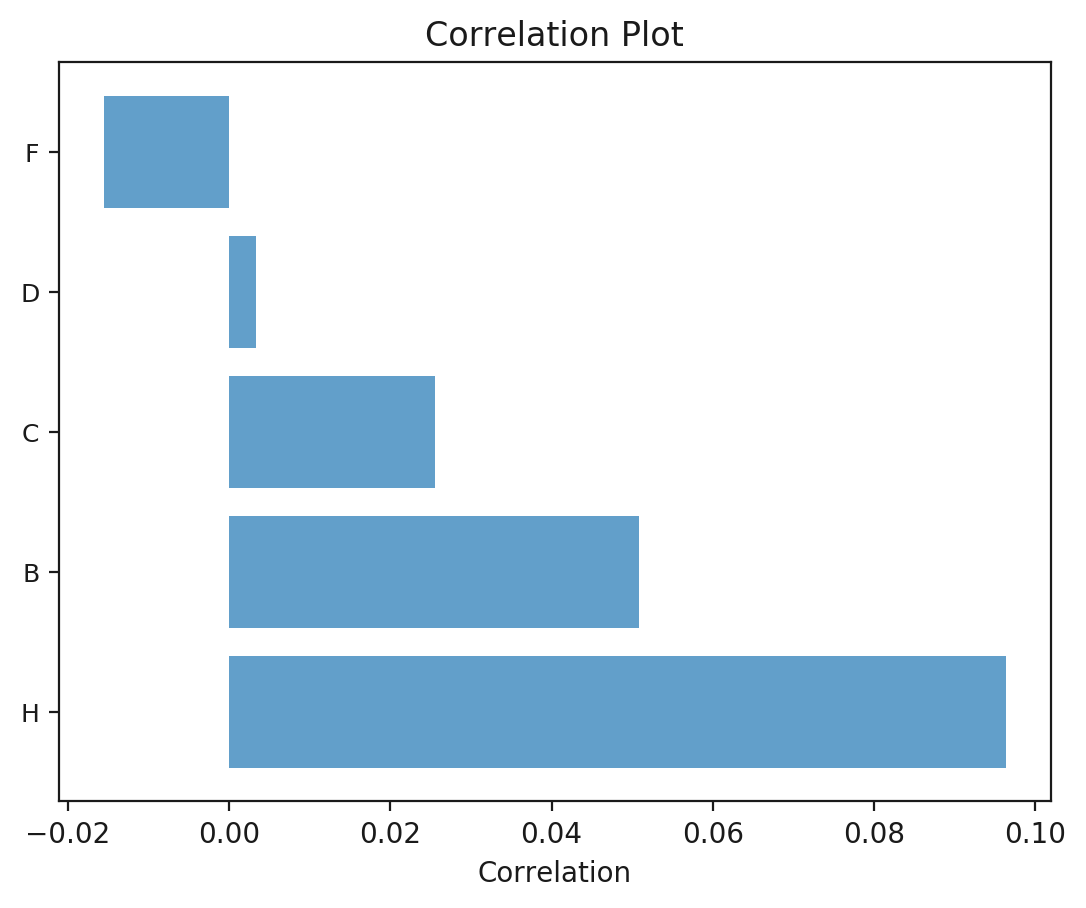

In [59]:
pl.correlation_bar_graph(df, 'A', top_n_feats=5)

## Violin Plot

In [31]:
import random
import string
df['Group'] = [random.choice(['A','M','Z']) for x in range(df.shape[0])]

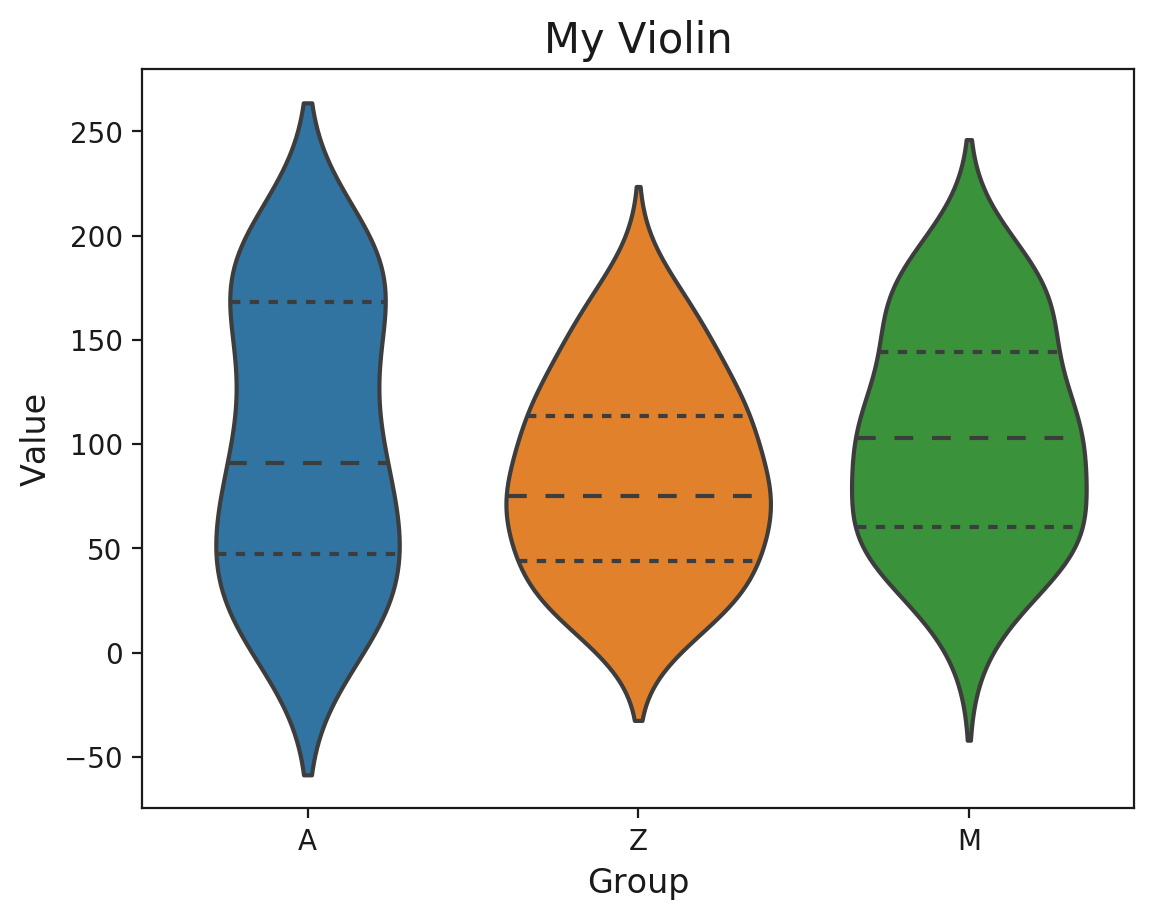

In [30]:
pl.violin_plot(df['Group'], df['A'], title="My Violin", x_label="Group", y_label="Value")

## spaghetti plot

<Figure size 640x480 with 0 Axes>

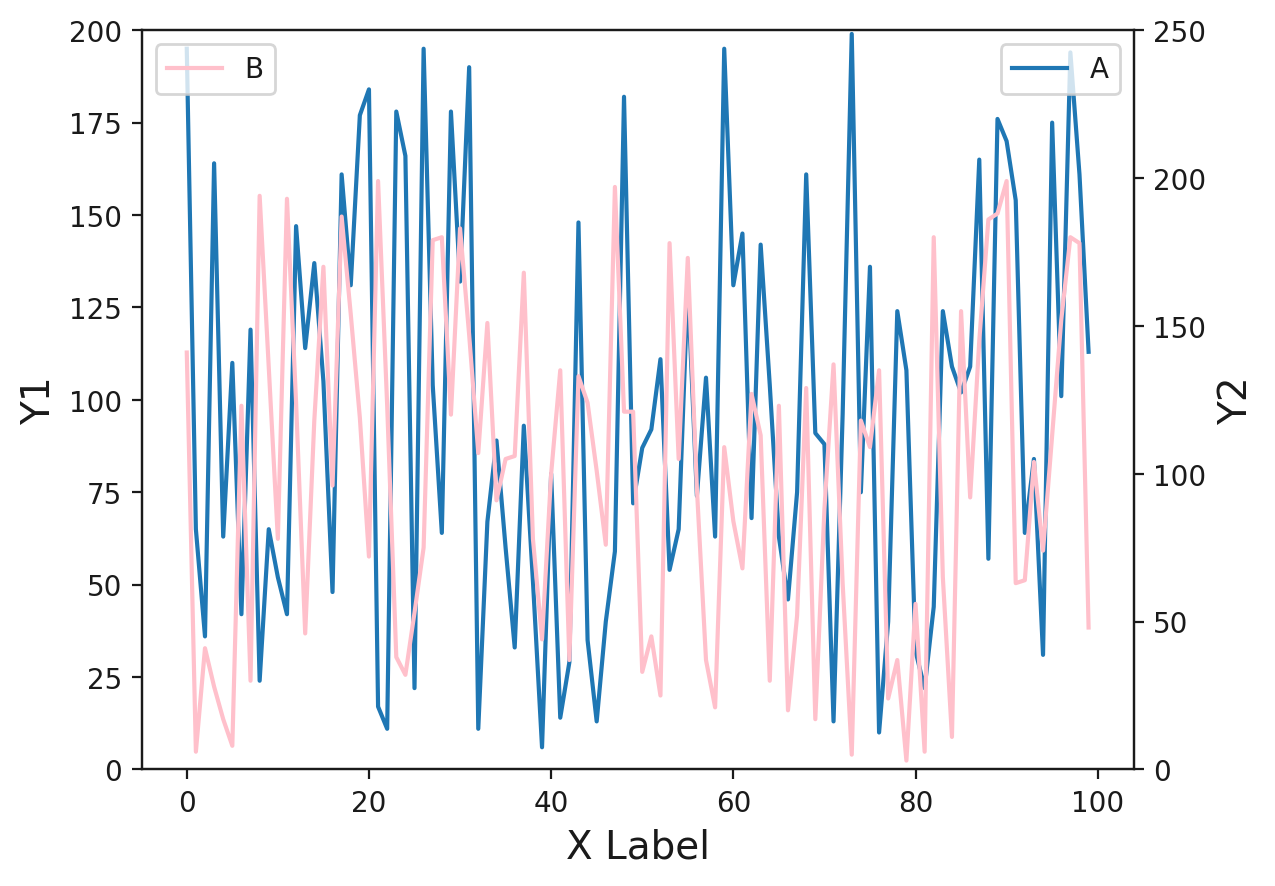

In [42]:
pl.spaghetti_plot(df['A'], df['B'], labels=['A','B'], x_label='X Label',
                   y1_label='Y1',y2_label='Y2',y1_lim=200,y2_lim=250
                 )

## 2D Histogram for Categorical Counts

In [53]:
importlib.reload(pl)

<module 'plots' from '../../src/eda/plots.py'>

In [54]:
df['Group 2'] = [random.choice(['A','M','Z', 'NEW']) for x in range(df.shape[0])]
df.head()

,A,B,C,D,E,F,G,H,Group,Group 2
0,195,141,35,126,23,39,21,93,A,NEW
1,65,6,20,9,9,80,121,193,A,Z
2,36,41,138,93,81,77,169,48,A,Z
3,164,28,31,121,136,188,63,167,A,M
4,63,17,31,119,18,129,45,22,M,Z


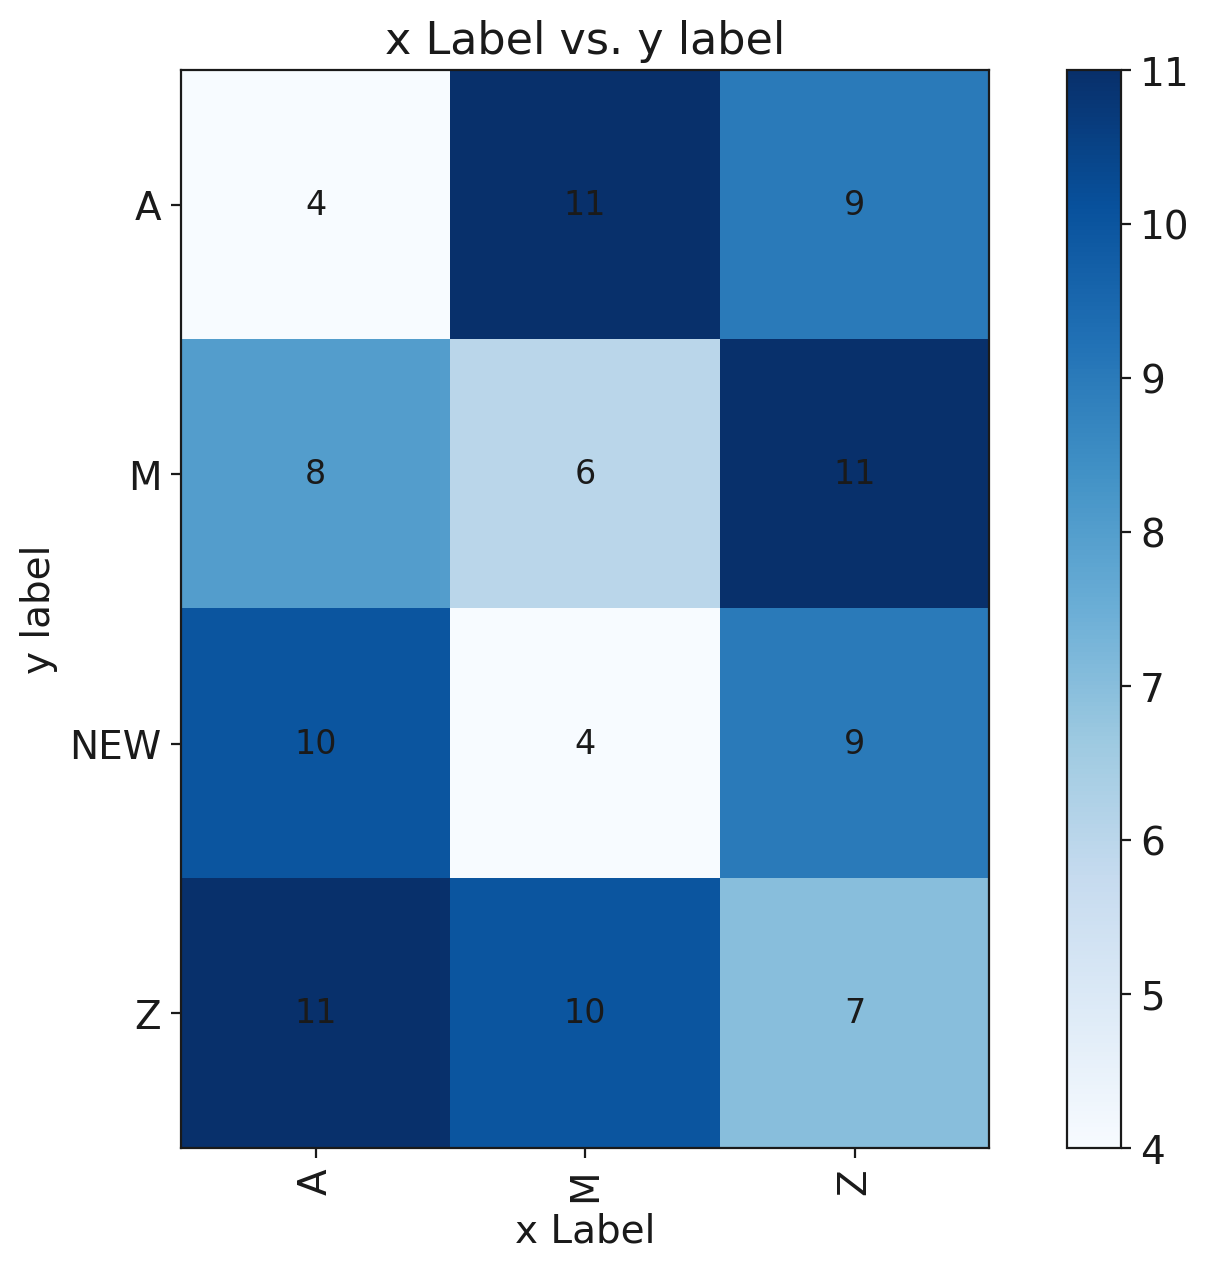

In [55]:
pl.hist2D(df, ["Group", "Group 2"],  ["x Label", "y label"])